In [1]:
# Name: Trevor Goad
# Student ID: 801161784
# Class: ECGR 4105 
# Date: 11/15/2021
# Assignment: HW_3
# GitHub Link: https://github.com/Wgoad/ECGR4105/blob/main/ECGR4105_HW3_Goad.ipynb

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
# Creating the data set
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
#Problem 1
#Read Data
X = breast_dataset.iloc[:, :30].values 
Y = breast_dataset.iloc[:, 30].values

In [5]:
#Problem 1
#Data Split
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1312)

In [6]:
#Problem 1
#Data Scaling
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [7]:
#Problem 1
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=6) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=6)

In [8]:
#Problem 1
#Prediction set
Y_pred = classifier.predict(X_test) 
Y_pred[0:10]

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [9]:
#Problem 1
#Accuracy, Precision, Recall
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9850746268656716
Recall: 1.0


In [10]:
#Problem 1
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[47,  1],
       [ 0, 66]], dtype=int64)

Text(0.5, 257.44, 'Predicted Value')

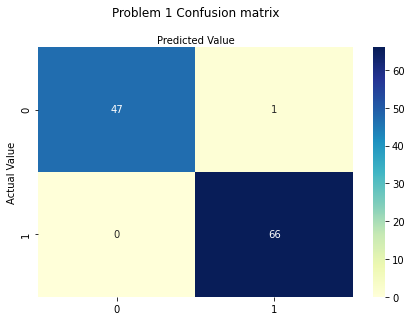

In [11]:
#Problem 1
#Confusion Matrix Plot
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Problem 1 Confusion matrix', y=1.1) 
plt.ylabel('Actual Value') 
plt.xlabel('Predicted Value')

In [12]:
#Problem 2 
#PCA data set creation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)

#apply the transform on training and test sets
PCA_train = pca.transform(X_train)
PCA_test = pca.transform(X_test)

In [13]:
#Problem 2
#Logistic Regression of PCA set
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=6) 
classifier.fit(PCA_train, Y_train)

LogisticRegression(random_state=6)

In [14]:
#Problem 2
#Prediction set of PCA set
Y_pred = classifier.predict(PCA_test) 
Y_pred[0:10]

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
#Problem 2
#Accuracy, Precision, Recall
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9428571428571428
Recall: 1.0


In [16]:
#Problem 2
#Confusion Matrix of PCA set
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[44,  4],
       [ 0, 66]], dtype=int64)

Text(0.5, 257.44, 'Predicted Value')

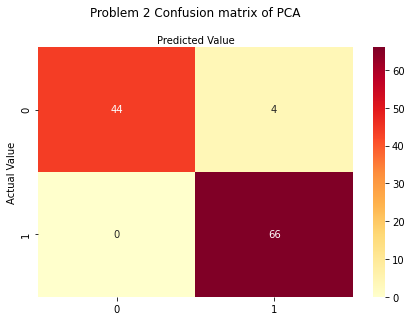

In [17]:
#Problem 2
#Confusion Matrix Plot
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Problem 2 Confusion matrix of PCA', y=1.1) 
plt.ylabel('Actual Value') 
plt.xlabel('Predicted Value')

In [18]:
#Problem 2 
#PCA data set creation
#determining best number for n
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train)

#apply the transform on training and test sets
PCA_train = pca.transform(X_train)
PCA_test = pca.transform(X_test)

In [19]:
#Problem 2
#Best number for n
pca.n_components_

10

In [20]:
#Problem 2
#Logistic Regression of the optimized PCA
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=6) 
classifier.fit(PCA_train, Y_train)

LogisticRegression(random_state=6)

In [21]:
#Problem 2
#Prediction set of optimized PCA set
Y_pred = classifier.predict(PCA_test) 
Y_pred[0:10]

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [22]:
#Problem 2
#Accuracy, Precision, Recall
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9912280701754386
Precision: 0.9850746268656716
Recall: 1.0


In [23]:
#Problem 2
#Confusion Matrix of optimized PCA set
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[47,  1],
       [ 0, 66]], dtype=int64)

Text(0.5, 257.44, 'Predicted Value')

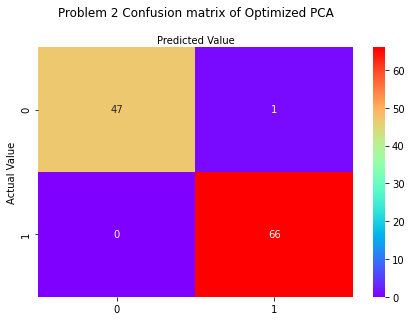

In [24]:
#Problem 2
#Confusion Matrix Plot
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rainbow" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Problem 2 Confusion matrix of Optimized PCA', y=1.1) 
plt.ylabel('Actual Value') 
plt.xlabel('Predicted Value')

In [25]:
#Problem 3 
#LDA data set creation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

#apply the transform on training and test sets
LDA_train = lda.transform(X_train)
LDA_test = lda.transform(X_test)

In [26]:
#Problem 3
#Naive Bayes Binary Classifier of LDA set
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(LDA_train, Y_train)

GaussianNB()

In [27]:
#Problem 3
#Prediction set of LDA set NB
Y_pred = classifier.predict(LDA_test) 
Y_pred[0:10]

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [28]:
#Problem 3
#Accuracy, Precision, Recall NB
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9565217391304348
Recall: 1.0


In [29]:
#Problem 3
#Confusion Matrix of LDA set NB
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[45,  3],
       [ 0, 66]], dtype=int64)

Text(0.5, 257.44, 'Predicted Value')

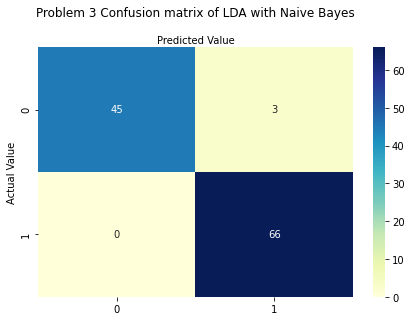

In [30]:
#Problem 3
#Confusion Matrix Plot of LDA NB
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Problem 3 Confusion matrix of LDA with Naive Bayes', y=1.1) 
plt.ylabel('Actual Value') 
plt.xlabel('Predicted Value')

In [31]:
#Problem 4
#Logistic Regression of LDA set 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=6) 
classifier.fit(LDA_train, Y_train)

LogisticRegression(random_state=6)

In [32]:
#Problem 4
#Prediction set of LDA set LR
Y_pred = classifier.predict(LDA_test) 
Y_pred[0:10]

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [33]:
#Problem 4
#Accuracy, Precision, Recall LR
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9565217391304348
Recall: 1.0


In [34]:
#Problem 4
#Confusion Matrix of LDA set LR
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[45,  3],
       [ 0, 66]], dtype=int64)

Text(0.5, 257.44, 'Predicted Value')

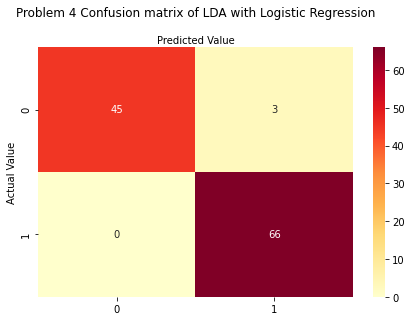

In [35]:
#Problem 4
#Confusion Matrix Plot for LDA LR
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Problem 4 Confusion matrix of LDA with Logistic Regression', y=1.1) 
plt.ylabel('Actual Value') 
plt.xlabel('Predicted Value')